# Exploratory Spatial Data Analysis

In [1]:
import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation
)
import geopandas as gpd
import numpy as np 
import contextily as ctx
import matplotlib.pyplot as plt

In [2]:
# Read the file in
gdf = gpd.read_file(
    "http://darribas.org/gds_course/content/data/brexit.gpkg"
)

gdf

,objectid,lad16cd,lad16nm,Pct_Leave,geometry
0,1,E06000001,Hartlepool,69.57,"MULTIPOLYGON (((-1.27024 54.72716, -1.27250 54..."
1,2,E06000002,Middlesbrough,65.48,"MULTIPOLYGON (((-1.23001 54.58410, -1.23431 54..."
2,3,E06000003,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-1.13717 54.64693, -1.13746 54..."
3,4,E06000004,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-1.31774 54.64524, -1.31869 54..."
4,5,E06000005,Darlington,56.18,"POLYGON ((-1.63799 54.61719, -1.64077 54.61739..."
...,...,...,...,...,...
375,387,W06000020,Torfaen,59.78,"POLYGON ((-3.10596 51.79548, -3.10843 51.79623..."
376,388,W06000021,Monmouthshire,49.56,"MULTIPOLYGON (((-3.05214 51.97294, -3.05695 51..."
377,389,W06000022,Newport,55.99,"MULTIPOLYGON (((-2.83439 51.64824, -2.83682 51..."
378,390,W06000023,Powys,53.74,"POLYGON ((-3.15484 52.89808, -3.15673 52.89853..."


In [8]:
# Index table on the LAD ID
gdf = gdf.set_index("lad16cd", drop=False)
# Display summary
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 380 entries, E06000001 to W06000024
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   objectid   380 non-null    int64   
 1   lad16cd    380 non-null    object  
 2   lad16nm    380 non-null    object  
 3   Pct_Leave  380 non-null    float64 
 4   geometry   380 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 17.8+ KB


<Axes: >

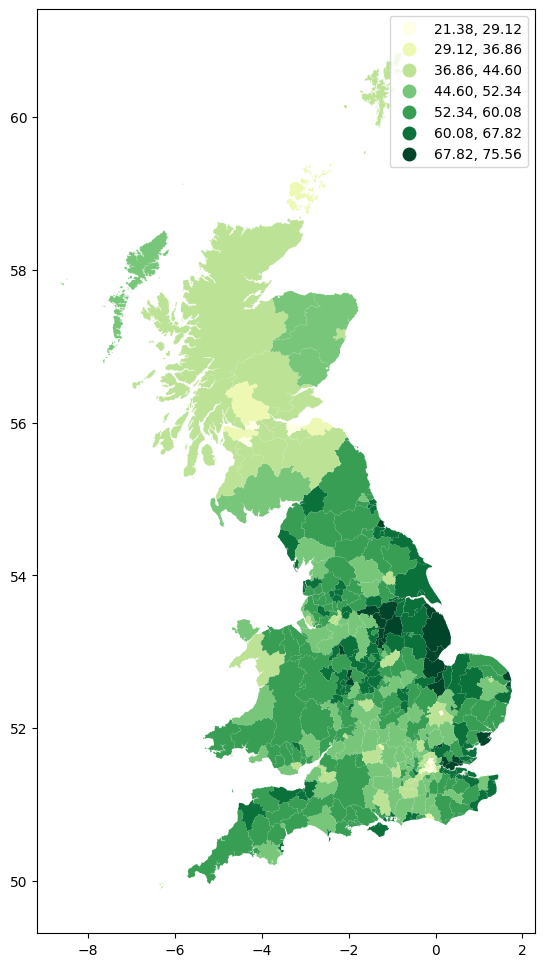

In [3]:
f, ax = plt.subplots(1, figsize=(12, 12))

gdf.plot(
    ax=ax,
    column="Pct_Leave", 
    scheme="equal_interval", 
    k=7,  # number of colors
    cmap="YlGn",
    legend=True
)


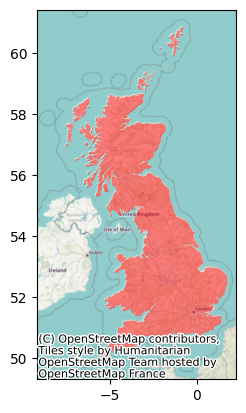

In [4]:
# Plot polygons
ax = gdf.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=gdf.crs)

In [6]:
# spatial weight matrix
w = weights.Queen.from_dataframe(gdf, idVariable='lad16cd')
w

/var/folders/rc/qy8z9khd3lg00kj97hlgl5z00000gn/T/ipykernel_81015/4003562948.py:2: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w = weights.Queen.from_dataframe(gdf, idVariable='lad16cd')
/Users/zefang/.local/share/virtualenvs/gis-q5Qx5MU5/lib/python3.12/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 7 disconnected components.
 There are 6 islands with ids: E06000046, E06000053, S12000013, S12000023, S12000027, W06000001.
  W.__init__(self, neighbors, ids=ids, **kw)


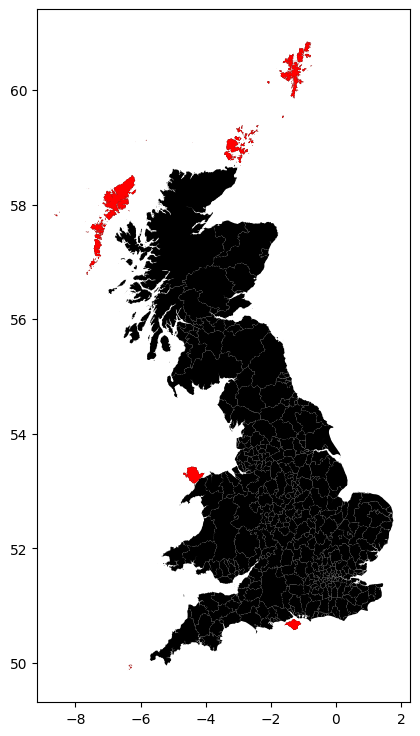

In [9]:
ax = gdf.plot(color='k', figsize=(9, 9))
gdf.loc[w.islands, :].plot(color='red', ax=ax);

In [10]:
gdf = gdf.drop(w.islands)

gdf

,objectid,lad16cd,lad16nm,Pct_Leave,geometry
lad16cd,,,,,
E06000001,1,E06000001,Hartlepool,69.57,"MULTIPOLYGON (((-1.27024 54.72716, -1.27250 54..."
E06000002,2,E06000002,Middlesbrough,65.48,"MULTIPOLYGON (((-1.23001 54.58410, -1.23431 54..."
E06000003,3,E06000003,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-1.13717 54.64693, -1.13746 54..."
E06000004,4,E06000004,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-1.31774 54.64524, -1.31869 54..."
E06000005,5,E06000005,Darlington,56.18,"POLYGON ((-1.63799 54.61719, -1.64077 54.61739..."
...,...,...,...,...,...
W06000020,387,W06000020,Torfaen,59.78,"POLYGON ((-3.10596 51.79548, -3.10843 51.79623..."
W06000021,388,W06000021,Monmouthshire,49.56,"MULTIPOLYGON (((-3.05214 51.97294, -3.05695 51..."
W06000022,389,W06000022,Newport,55.99,"MULTIPOLYGON (((-2.83439 51.64824, -2.83682 51..."


In [12]:
w = weights.Queen.from_dataframe(gdf, idVariable='lad16cd')

/var/folders/rc/qy8z9khd3lg00kj97hlgl5z00000gn/T/ipykernel_81015/1460567352.py:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
  w = weights.Queen.from_dataframe(gdf, idVariable='lad16cd')


In [13]:
# Row standardize the matrix
w.transform = 'R'  # row sum to one

# Spatial lag

In [15]:
# the spatial lag is the average of all the neighbouring areas

gdf['w_Pct_Leave'] = weights.lag_spatial(w, gdf['Pct_Leave'])

gdf.head()

,objectid,lad16cd,lad16nm,Pct_Leave,geometry,w_Pct_Leave
lad16cd,,,,,,
E06000001,1,E06000001,Hartlepool,69.57,"MULTIPOLYGON (((-1.27024 54.72716, -1.27250 54...",59.640000
E06000002,2,E06000002,Middlesbrough,65.48,"MULTIPOLYGON (((-1.23001 54.58410, -1.23431 54...",60.526667
E06000003,3,E06000003,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-1.13717 54.64693, -1.13746 54...",60.376667
E06000004,4,E06000004,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-1.31774 54.64524, -1.31869 54...",60.488000
E06000005,5,E06000005,Darlington,56.18,"POLYGON ((-1.63799 54.61719, -1.64077 54.61739...",57.430000


In [17]:
gdf['Pct_Leave_std'] = (
    gdf['Pct_Leave'] - gdf['Pct_Leave'].mean()
) / gdf['Pct_Leave'].std()

In [19]:
gdf['w_Pct_Leave_std'] = weights.lag_spatial(w, gdf['Pct_Leave_std'])

gdf.head()

,objectid,lad16cd,lad16nm,Pct_Leave,geometry,w_Pct_Leave,Pct_Leave_std,w_Pct_Leave_std
lad16cd,,,,,,,,
E06000001,1,E06000001,Hartlepool,69.57,"MULTIPOLYGON (((-1.27024 54.72716, -1.27250 54...",59.640000,1.566940,0.614088
E06000002,2,E06000002,Middlesbrough,65.48,"MULTIPOLYGON (((-1.23001 54.58410, -1.23431 54...",60.526667,1.174476,0.699170
E06000003,3,E06000003,Redcar and Cleveland,66.19,"MULTIPOLYGON (((-1.13717 54.64693, -1.13746 54...",60.376667,1.242605,0.684776
E06000004,4,E06000004,Stockton-on-Tees,61.73,"MULTIPOLYGON (((-1.31774 54.64524, -1.31869 54...",60.488000,0.814638,0.695459
E06000005,5,E06000005,Darlington,56.18,"POLYGON ((-1.63799 54.61719, -1.64077 54.61739...",57.430000,0.282077,0.402023


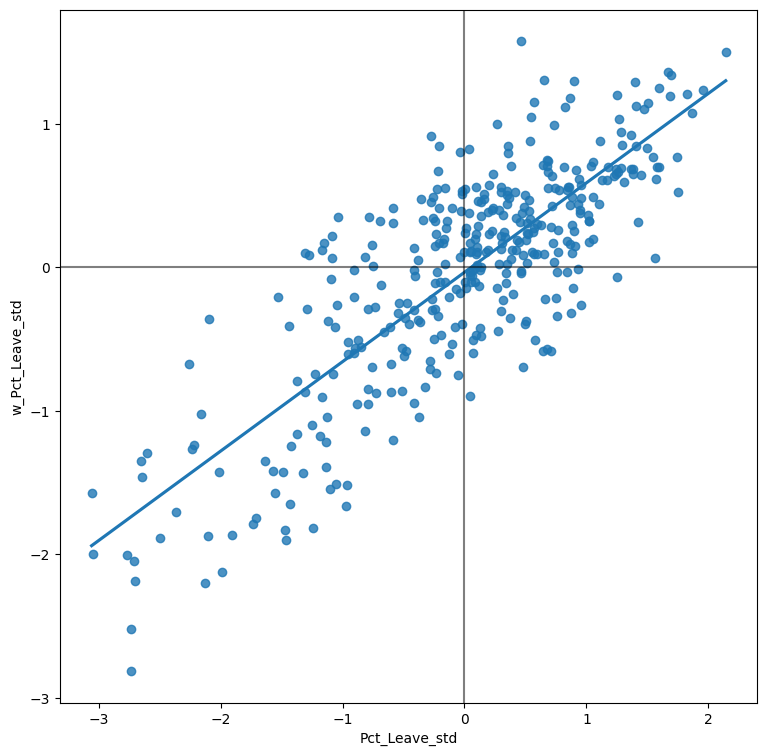

In [21]:
# global spatial autocorrelation

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='Pct_Leave_std', y='w_Pct_Leave_std', data=gdf, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

# Moran's I

In [24]:
mi = esda.Moran(gdf['Pct_Leave'], w)

mi.I

0.6228641407137805

In [25]:
mi.p_sim

# if we generated a large number of maps with the same values but randomly allocated over space, and calculated the Moran’s I statistic for each of those maps, only 0.1% of them would display a larger (absolute) value than the one we obtain from the real data, and the other 99.9% of the random maps would receive a smaller (absolute) value of Moran’s I.

0.001

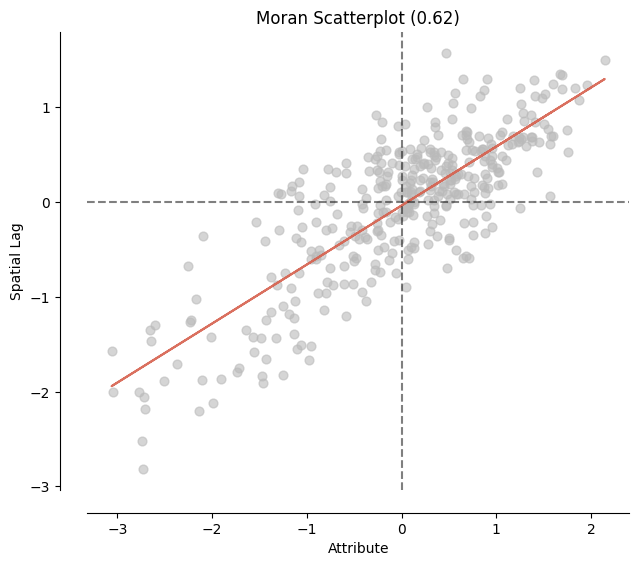

In [26]:
moran_scatterplot(mi);

# Local spatial autocorrelation

Local indicators of Spatial Association

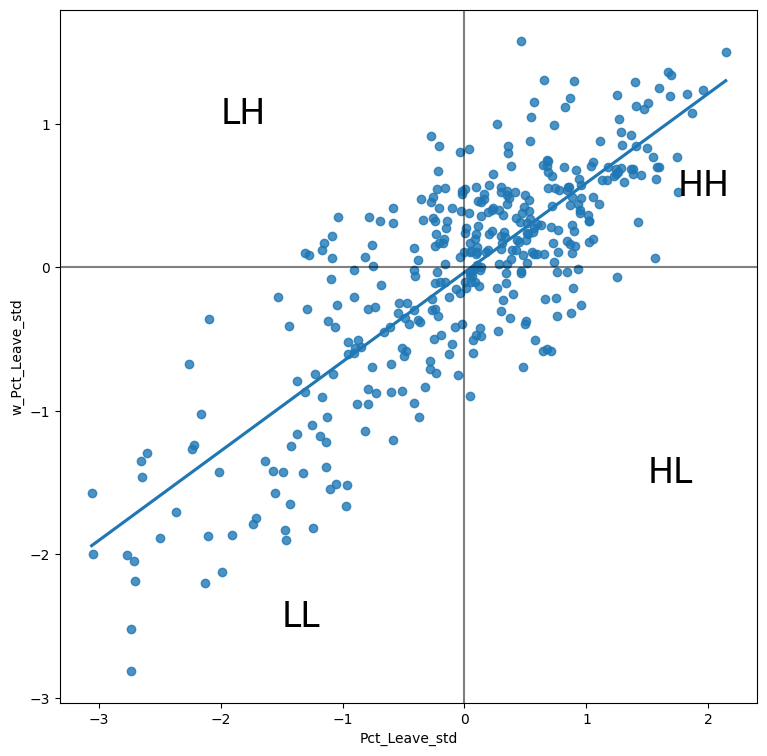

In [27]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='Pct_Leave_std', y='w_Pct_Leave_std', data=gdf, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Display
plt.show()